#  From Norms to Topology — Mathematical Structures in Data Science

> Natural language + mathematical precision + real Python examples.

---

##  Overview

We’ll explore **three fundamental mathematical structures** that build on each other:
- **Normed Spaces**
- **Metric Spaces**
- **Topological Spaces**

Each one appears in real-world **Data Science applications**.

---
## 0. Vector Spaces — The Algebraic Foundation
Before defining norms, let's understand the algebraic structure behind vectors.
- A **vector space** $V$ over a field (like $\mathbb{R}$ or $\mathbb{C}$) is:

  1. An **abelian group** $(V, +)$, meaning:
     - **Closure:** For all $u, v \in V$, $u + v \in V$
     - **Associativity:** $(u + v) + w = u + (v + w)$
     - **Identity element:** There exists $0 \in V$ such that $v + 0 = v$ for all $v$
     - **Inverses:** For each $v$, there exists $-v$ such that $v + (-v) = 0$
     - **Commutativity:** $u + v = v + u$ for all $u, v$

  2. A **scalar multiplication** that defines an **action** of the field $\mathbb{F}$ on $V$:
  $$ \cdot : \mathbb{F} \times V \to V, \quad (a, v) \mapsto a \cdot v $$ 

    This action satisfies:


     - **Compatibility:** $(ab) \cdot v = a \cdot (b \cdot v)$ for $a,b \in \mathbb{F}$ and $v \in V$
     - **Identity:** $1 \cdot v = v$
     - **Distributivity over vector addition:** $a \cdot (u + v) = a \cdot u + a \cdot v$
     - **Distributivity over scalar addition:** $(a + b) \cdot v = a \cdot v + b \cdot v$

These properties ensure that scalar multiplication behaves **linearly and coherently** with the vector addition structure.


---

### Concrete Example: Real Vector Space $\mathbb{R}^n$

In [16]:
import numpy as np
# Two vectors in R^3
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])
# Vector addition
v_sum = v1 + v2  # element-wise addition
# Scalar multiplication
v_scaled = 3 * v1
print("v1 + v2 =", v_sum)
print("3 * v1 =", v_scaled)

v1 + v2 = [5 7 9]
3 * v1 = [3 6 9]


## Why does this matter?
This algebraic structure allows us to **combine features, scale variables**, and define linear transformations.

The **group structure** ensures vector addition behaves predictably.

The **scalar action** lets us stretch or shrink vectors — fundamental in algorithms like PCA, linear regression, and neural networks.

##  1. Normed Spaces

###  Formal Definition

Let $V$ be a vector space over $\mathbb{R}$ or $\mathbb{C}$. A **norm** is a function $\|\cdot\| : V \to \mathbb{R}$ such that for all $x, y \in V$, and $\lambda \in \mathbb{R}$:

1. **Non-negativity**: $\|x\| \geq 0$, and $\|x\| = 0 \iff x = 0$  
2. **Homogeneity**: $\|\lambda x\| = |\lambda| \cdot \|x\|$  
3. **Triangle inequality**: $\|x + y\| \leq \|x\| + \|y\|$

Then $(V, \|\cdot\|)$ is a **normed vector space**.

---

### Applied Example: Feature Vectors in NLP

In [10]:
import numpy as np
# Simulate 2 word embeddings (from Word2Vec, for example)
word1 = np.random.rand(300)
word2 = np.random.rand(300)

# ℓ2 norm
def l2_norm(v):
    return np.linalg.norm(v)

# ℓ1 norm
def l1_norm(v):
    return np.sum(np.abs(v))

print("‖word1‖₂ =", l2_norm(word1))
print("‖word1‖₁ =", l1_norm(word1))

‖word1‖₂ = 10.245112598502326
‖word1‖₁ = 154.50623603119993


## Inner Product Spaces — Geometry in Vector Spaces

Not all normed spaces come from inner products, but **every inner product induces a norm**.

---

###  Formal Definition

Let $V$ be a vector space over $\mathbb{R}$ . An **inner product** is a function:

$$
\langle \cdot, \cdot \rangle : V \times V \to \mathbb{R} 
$$

that satisfies, for all $x, y, z \in V$ and scalars $a \in \mathbb{R}$:


  1. **Bilinearity**:
     - $\langle ax + y, z \rangle = a \langle x, z \rangle + \langle y, z \rangle$
     - $\langle x, ay + z \rangle = a \langle x, y \rangle + \langle x, z \rangle$
  2. **Symmetry**: $\langle x, y \rangle = \langle y, x \rangle$
  3. **Positive definiteness**: $\langle x, x \rangle \geq 0$ and equals 0 iff $x = 0$



---

###  Inner Product Induces a Norm

From the inner product, we define:

$$
\|x\| := \sqrt{\langle x, x \rangle}
$$

This makes every inner product space a **normed space**, but not all normed spaces arise from inner products.

---

### Why It Matters in Data Science

Inner products give access to:

- **Vector length**: via $\|x\|$
- **Angle between vectors**: $\cos(\theta) = \frac{\langle x, y \rangle}{\|x\| \|y\|}$
- **Orthogonality**: when $\langle x, y \rangle = 0$
- **Orthogonal projection**: used in PCA, regression, etc.
- **Similarity**: especially **cosine similarity** in NLP and recommender systems

---

###  Example: Cosine Similarity

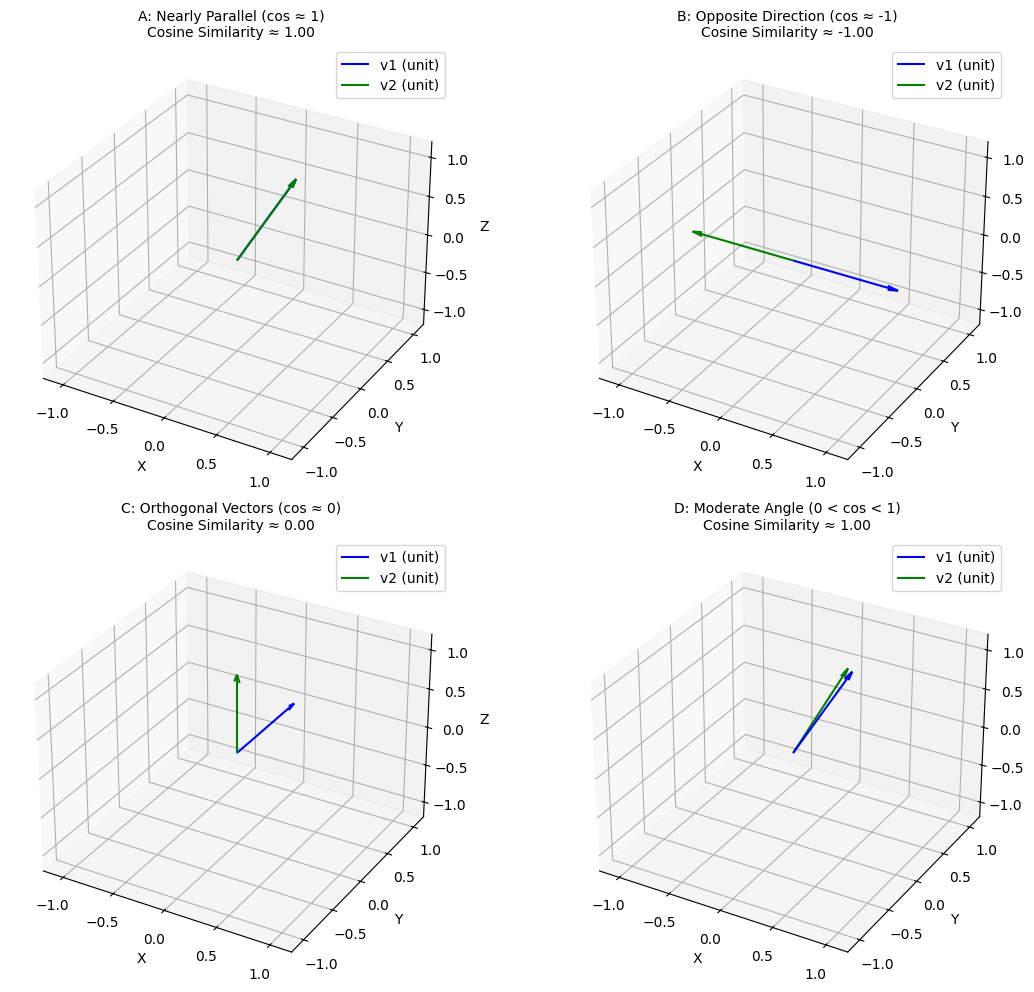

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define vector pairs for each quadrant (unscaled)
vector_pairs = [
    (np.array([1, 2, 3]), np.array([2, 4, 6])),     # A: same direction
    (np.array([1, 0, 0]), np.array([-1, 0, 0])),    # B: opposite
    (np.array([0, 1, 0]), np.array([0, 0, 1])),     # C: orthogonal
    (np.array([1, 2, 3]), np.array([2, 6, 8]))      # D: moderate angle
]

titles = [
    "A: Nearly Parallel (cos ≈ 1)",
    "B: Opposite Direction (cos ≈ -1)",
    "C: Orthogonal Vectors (cos ≈ 0)",
    "D: Moderate Angle (0 < cos < 1)"
]

def cosine_similarity(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

# Normalize for plotting
def normalize(v):
    return v / np.linalg.norm(v)

# Plot
fig = plt.figure(figsize=(12, 10))

for i, (v1, v2) in enumerate(vector_pairs):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    origin = np.zeros(3)

    # Normalize for consistent scale in plots
    v1_unit = normalize(v1)
    v2_unit = normalize(v2)

    # Cosine similarity (original vectors)
    cos_sim = cosine_similarity(v1, v2)

    # Plot unit vectors to represent direction only
    ax.quiver(*origin, *v1_unit, color='blue', label='v1 (unit)', arrow_length_ratio=0.1)
    ax.quiver(*origin, *v2_unit, color='green', label='v2 (unit)', arrow_length_ratio=0.1)

    # Plot formatting
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1.2, 1.2])
    ax.set_zlim([-1.2, 1.2])
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title(f"{titles[i]}\nCosine Similarity ≈ {cos_sim:.2f}", fontsize=10)
    ax.legend()

plt.tight_layout()
plt.show()


# 2. Metric Spaces
### Formal Definition
A metric space is a pair $(X, d)$, where $X$ is a set and $d : X \times X \to \mathbb{R}$ is a function such that for all $x, y, z \in X$:

1. $d(x, y) \geq 0$, and $d(x, y) = 0 \iff x = y$

2. $d(x, y) = d(y, x)$

3. $d(x, z) \leq d(x, y) + d(y, z)$ (triangle inequality)

### Applied Example: Clustering with Different Metrics

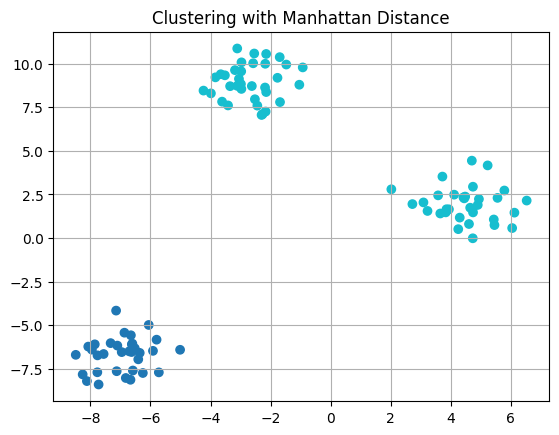

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

# Simulate dataset
X, _ = make_blobs(n_samples=100, centers=3, random_state=42)

# Use DBSCAN with Manhattan distance (ℓ1 metric)
model = DBSCAN(eps=10, metric='manhattan')
labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10')
plt.title("Clustering with Manhattan Distance")
plt.grid(True)
plt.show()

> The choice of metric affects how similarity is computed, and **can change the shape of the clusters.**

# 3. Topological Spaces
### Formal Definition

A **topological space** is a set $X$ along with a collection $\mathcal{T} \subseteq \mathcal{P}(X)$ (called the open sets) such that:

1. $\emptyset \in \mathcal{T}$ and $X \in \mathcal{T}$

2. Any union of open sets is an open set

3. Any finite intersection of open sets is an open set

The pair $(X, \mathcal{T})$ is called a topological space.

### Applied Example: Topology-Aware Dimensionality Reduction (UMAP)

/home/thiagodsa/.local/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


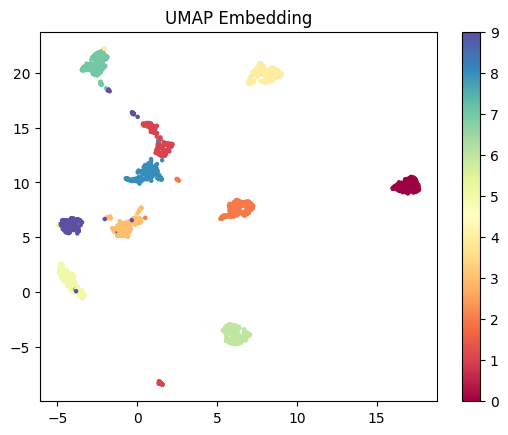

In [ ]:
import umap
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data
y = digits.target
# UMAP constructs a topological representation of the data
reducer = umap.UMAP(random_state=42)
X_embedded = reducer.fit_transform(X)

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='Spectral', s=5)
plt.title("UMAP Embedding")
plt.colorbar()
plt.show()

> UMAP builds a **fuzzy topological representation** of the data based on local neighborhoods. It is **not metric-based** in the traditional Euclidean sense — it's topology-driven.

## Topological Spaces: The Most Flexible Way to Study Shape
Topological spaces generalize the notion of “nearness” or “closeness” **without relying on distance**.  
They allow us to **preserve the essential behavior of functions and shapes**, while ignoring rigid geometric constraints like length or angles.

###  Same Shape, Different Geometry

Two shapes can be **topologically equivalent** even if they look wildly different geometrically.  
This is the idea behind **homeomorphisms** — continuous deformations with continuous inverses.

####  Example: Coffee Mug and Doughnut

A classic example: a **coffee mug** and a **torus** (doughnut) are topologically the same.  
Despite looking very different, a coffee mug and a doughnut are **topologically equivalent** — both have exactly **one hole**.

![Coffee Mug <-> ](https://upload.wikimedia.org/wikipedia/commons/2/26/Mug_and_Torus_morph.gif)

> Both shapes can be continuously deformed into each other without tearing or gluing.

---

###  More Exotic Example: The Klein Bottle

The **Klein bottle** is a topological surface where **inside and outside are the same** — it’s **non-orientable**.

- It cannot be embedded in 3D space without self-intersection.
- It's a cousin of the **Möbius strip**, but “closed.”
- No distinct “interior” or “exterior” — mind-bending for geometry, but natural in topology.

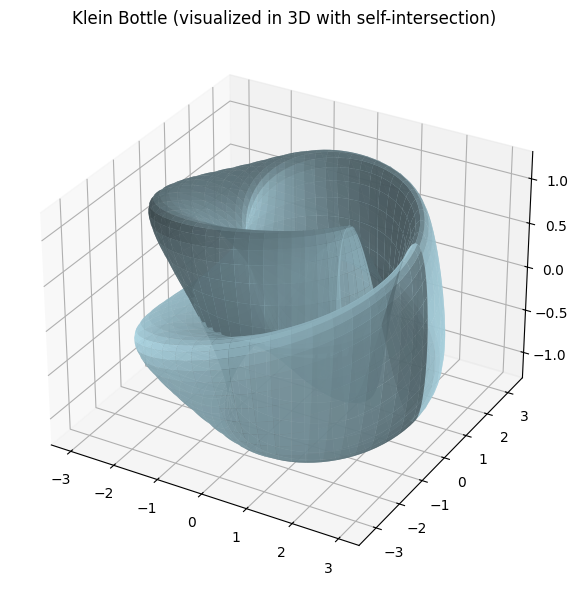

In [ ]:
# Visualizing a Klein bottle 
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

u = np.linspace(0, 2*np.pi, 100)
v = np.linspace(0, 2*np.pi, 100)
u, v = np.meshgrid(u, v)

x = (2 + np.cos(u/2)*np.sin(v) - np.sin(u/2)*np.sin(2*v)) * np.cos(u)
y = (2 + np.cos(u/2)*np.sin(v) - np.sin(u/2)*np.sin(2*v)) * np.sin(u)
z = np.sin(u/2)*np.sin(v) + np.cos(u/2)*np.sin(2*v)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, color='lightblue', alpha=0.8, linewidth=0)
ax.set_title("Klein Bottle (visualized in 3D with self-intersection)")
plt.tight_layout()
plt.show()

##  A Hierarchy of Mathematical Structures

Every **inner product space** gives rise to:

- a **norm** (via $\|x\| = \sqrt{\langle x, x \rangle}$)
- a **metric** (via $d(x, y) = \|x - y\|$)
- a **topology** (induced by the metric)

So we have the logical implication chain:

$$
\text{Inner Product Space} \Rightarrow \text{Normed Space} \Rightarrow \text{Metric Space} \Rightarrow \text{Topological Space}
$$

None of these implications are reversible in general.


### Why Topology Is So Powerful

Even **without a norm or a metric**, a topological space can still support:

- **Limits**: defined via open sets rather than distances  
- **Continuity**: a function $f$ is continuous if the preimage of every open set is open  
- **Convergence**: based on neighborhoods rather than numbers

This means many of the foundational ideas from **Calculus 1** — limits, continuity, and convergence — **still make sense** in **abstract topological spaces**.


## Summary Table

| **Structure**        | **Definition Basis**     | **Data Science Role**                          | **Tools / Algorithms**                      |
|----------------------|---------------------------|-------------------------------------------------|---------------------------------------------|
| **Normed Space**     | Vector + Norm             | Measuring feature magnitudes, regularization    | ℓ2 (Ridge), ℓ1 (Lasso), embeddings           |
| **Metric Space**     | Set + Distance            | Similarity, clustering, KNN                     | K-Means, DBSCAN, cosine distance            |
| **Topological Space**| Set + Open Sets           | Manifold learning, shape of data                | UMAP, TDA, t-SNE                            |

##  Final Remark: The Power of Structural Thinking in Mathematics

A mathematician’s strength lies in **thinking structurally**.  
Rather than focusing solely on the individual object, we ask:  
**What assumptions and structures am I working with?**

This shift in perspective allows us to uncover the most **general frameworks** and opens the door to meaningful generalizations.

---

### Topological Spaces: A Model of Abstraction and Flexibility

Topological spaces represent one of the most **abstract and flexible frameworks** in mathematics.  
They let us study concepts like continuity, limits, and shape without relying on distances or metrics.

But what about differentiation?

There are richer structures where topological spaces are **locally modeled on Euclidean spaces** $\mathbb{R}^n$ through **local homeomorphisms** — a topic I explored in my undergraduate thesis.  
These homeomorphisms enable us to define notions such as:

- Differentiable functions on abstract spaces  
- Vector fields  
- Tangent spaces  

---

### Bridging to Data Science

Although these concepts come from pure mathematics, they resonate strongly with data science.  

When working with collections of documents, images, graphs, or their latent representations,  
we can think of these datasets as forming **geometric or topological “spaces”** — not in the classical sense, but as analogues that help us understand their structure.

This perspective allows us to borrow powerful tools from topology, geometry, and analysis  
to model, analyze, and extract meaning from complex data.

---

> Ultimately, approaching problems through the lens of structure empowers us to unify diverse concepts,  
> gain deeper insights, and push both pure mathematics and applied fields like data science forward.


## Contact

Thiago Guimarães  
Email: thiago.guimaraes@example.com  
LinkedIn: https://www.linkedin.com/in/thiagogsdsa/  
GitHub: https://github.com/thiagogsdsa
